# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 569


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


In [6]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =city_weather["wind"]["speed"]
        city_country =city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | teknaf
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | souq larb'a al gharb
Processing Record 4 of Set 1 | susuman
Processing Record 5 of Set 1 | balqash
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | kailua-kona
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | kirensk
Processing Record 13 of Set 1 | isangel
Processing Record 14 of Set 1 | coahuayana de hidalgo
Processing Record 15 of Set 1 | ishigaki
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | ta`u
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [8]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,teknaf,20.8624,92.3058,300.98,84,99,4.34,BD,1686622836
1,ilulissat,69.2167,-51.1000,275.16,75,75,0.00,GL,1686622837
2,souq larb'a al gharb,34.6866,-6.0027,293.04,82,69,0.91,MA,1686622837
3,susuman,62.7833,148.1667,287.63,73,100,3.63,RU,1686622837
4,balqash,46.8481,74.9950,294.48,24,0,10.00,KZ,1686622838


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,teknaf,20.8624,92.3058,300.98,84,99,4.34,BD,1686622836
1,ilulissat,69.2167,-51.1000,275.16,75,75,0.00,GL,1686622837
2,souq larb'a al gharb,34.6866,-6.0027,293.04,82,69,0.91,MA,1686622837
3,susuman,62.7833,148.1667,287.63,73,100,3.63,RU,1686622837
4,balqash,46.8481,74.9950,294.48,24,0,10.00,KZ,1686622838


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

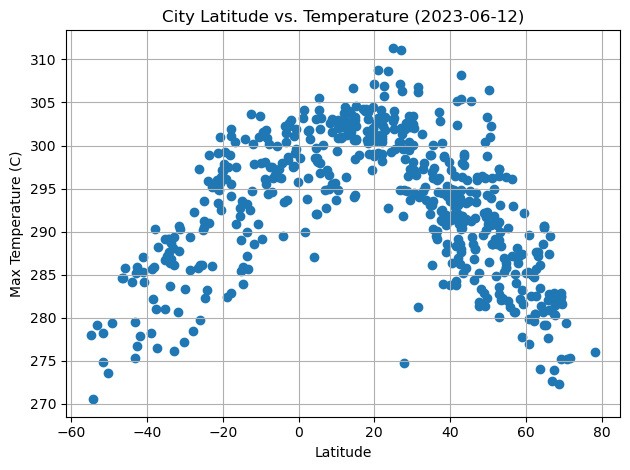

In [17]:
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties

date = datetime.date.today()
date = date.strftime("%Y-%m-%d")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

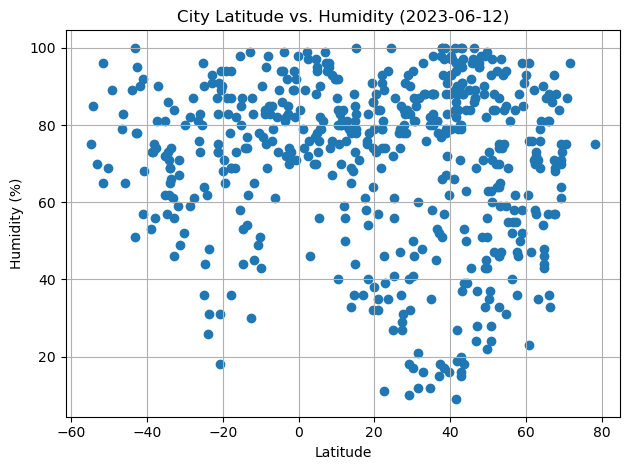

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])


# Incorporate the other graph properties
date = datetime.date.today()
date = date.strftime("%Y-%m-%d")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

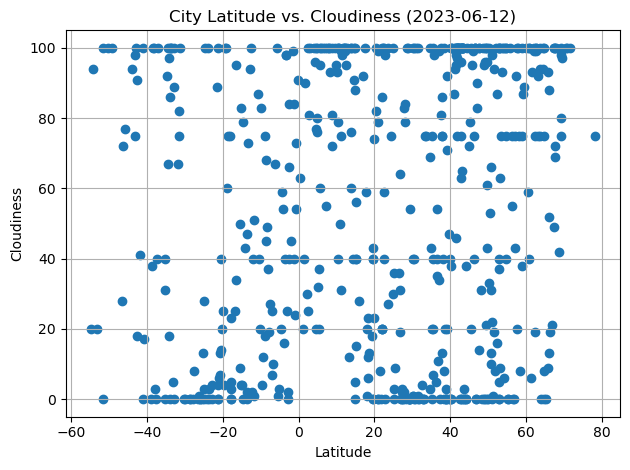

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
date = datetime.date.today()
date = date.strftime("%Y-%m-%d")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

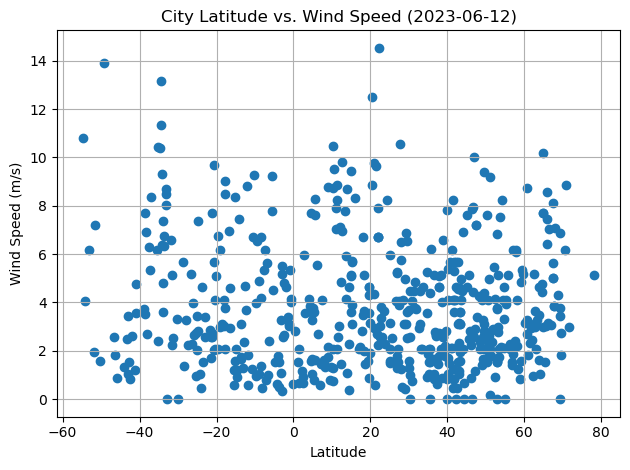

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
date = datetime.date.today()
date = date.strftime("%Y-%m-%d")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x,y):
    slope = linregress(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x, y)
    plt.plot(x, regress_values, "-r")
    plt.annotate(line_eq,(40,20),fontsize=15,color="red")
    

In [28]:
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >= 0, :]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,teknaf,20.8624,92.3058,300.98,84,99,4.34,BD,1686622836
1,ilulissat,69.2167,-51.1000,275.16,75,75,0.00,GL,1686622837
2,souq larb'a al gharb,34.6866,-6.0027,293.04,82,69,0.91,MA,1686622837
3,susuman,62.7833,148.1667,287.63,73,100,3.63,RU,1686622837
4,balqash,46.8481,74.9950,294.48,24,0,10.00,KZ,1686622838


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df=city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port-aux-francais,-49.3500,70.2167,279.40,89,100,13.89,TF,1686622838
7,adamstown,-25.0660,-130.1015,293.56,64,28,3.45,PN,1686622839
9,edinburgh of the seven seas,-37.0676,-12.3116,288.25,90,100,8.37,SH,1686622840
12,isangel,-19.5500,169.2667,299.21,65,100,2.06,VU,1686622841
16,ta`u,-14.2336,-169.5144,300.75,74,43,7.47,AS,1686622842


###  Temperature vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Max Temp')

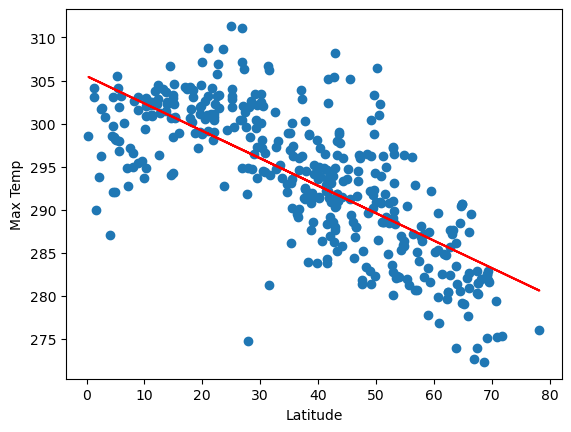

In [30]:
x= northern_df["Lat"]
y= northern_df["Max Temp"]
lin_reg=linear_reg_plot(x,y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

The r-value is: 0.7161472181434118


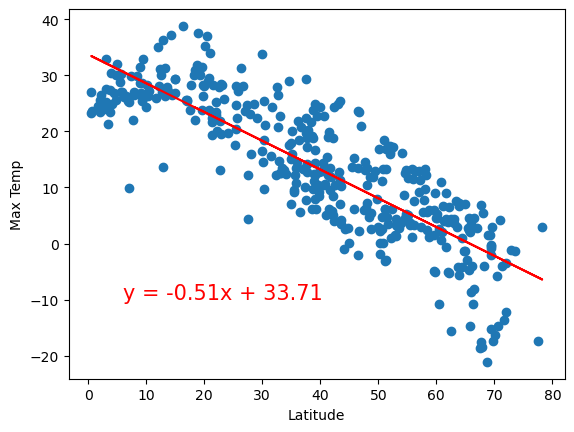

In [15]:
# Linear regression on Northern Hemisphere
x= northern_df["Lat"]
y= northern_df["Max Temp"]
lin_reg=linear_reg_plot(x,y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
# print(f'The r-value is {rvalue}')

The r-value is: 0.4121057168607245


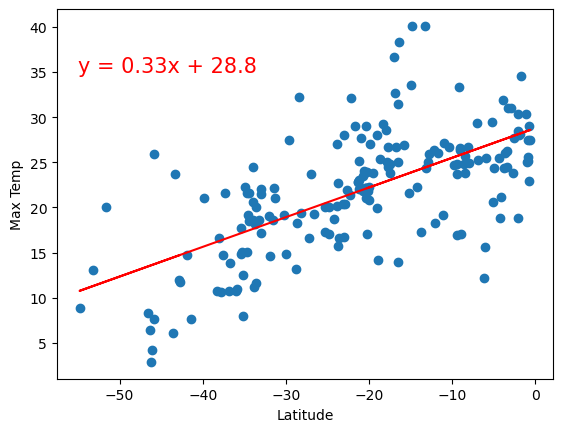

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


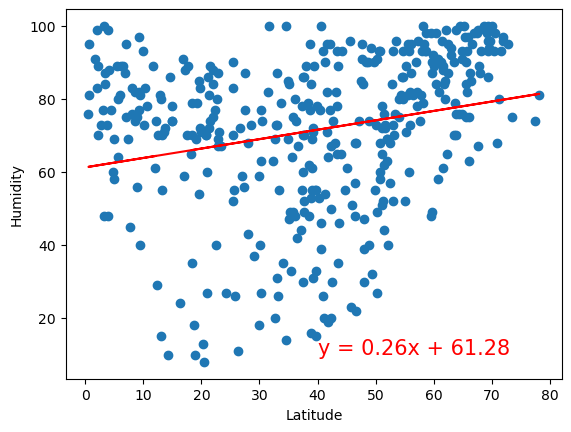

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


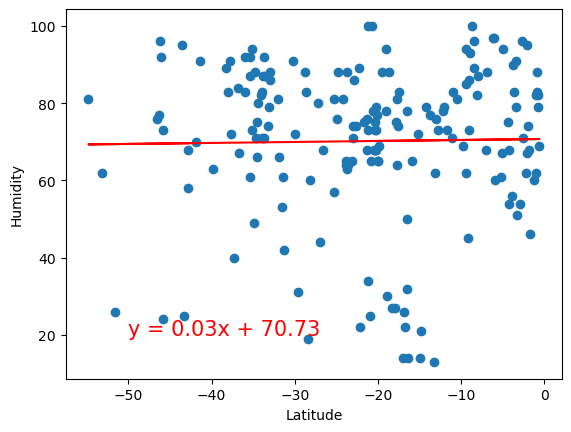

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


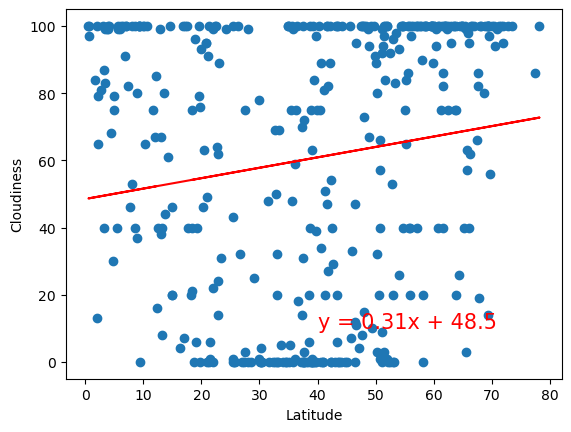

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


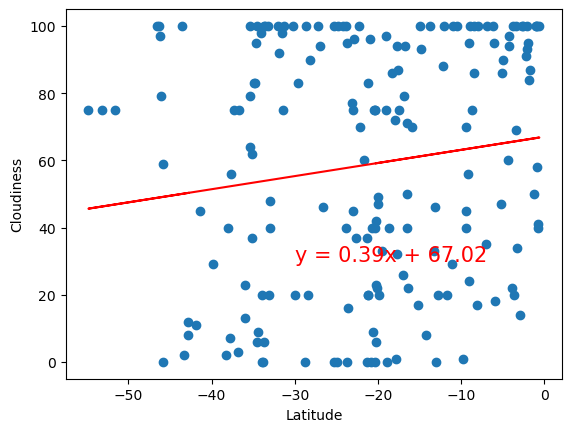

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


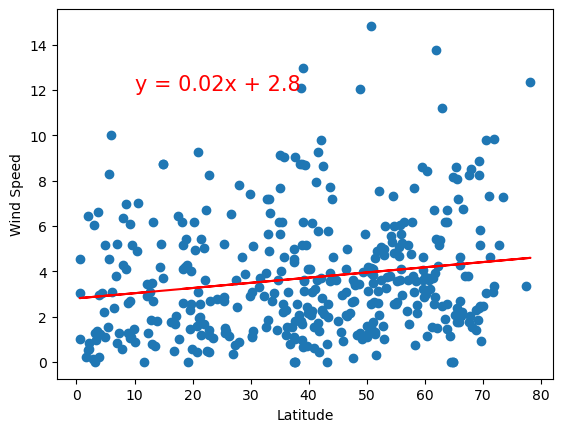

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


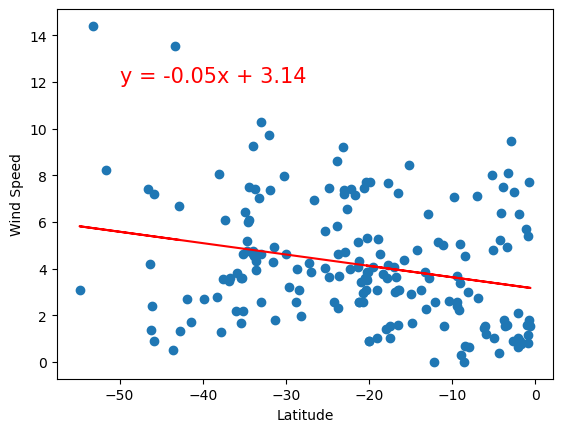

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE